In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [2]:
Data = pd.read_excel(r'Amreli and MSP NRM data.xlsx')
a = np.zeros((Data.shape[0],1))
df = pd.DataFrame(a,columns=['Batch_number'])
# Introducting batch numbers
k = 1
for i in range(Data.shape[0]-1):
    if(Data.iloc[i+1,0]<Data.iloc[i,0]):
        k = k+1
    df.iloc[i,0] = k
df.iloc[i+1,0]=k    
    

In [3]:
Data = pd.concat([df,Data],axis=1)

In [4]:
Data['Batch_number'].value_counts()

9.0     63
8.0     61
7.0     53
6.0     53
4.0     51
10.0    47
3.0     45
5.0     44
1.0     44
2.0     34
Name: Batch_number, dtype: int64

In [5]:
Data_part1 = Data.iloc[:,:-1]
remove = ['Scrap (MT)','Sponge (MT)','Hot Heel (MT)', 'Alloys (MT)','Batch_number']
Data_part1.drop(remove,axis='columns',inplace=True)

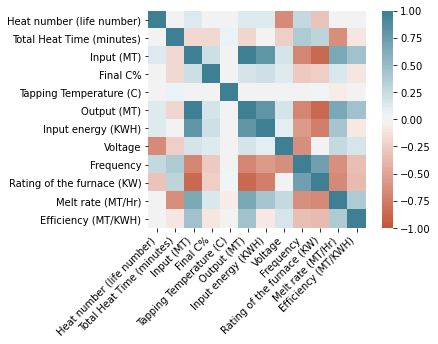

In [6]:
cor = Data_part1.corr()
ax = sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [7]:
Data_part1.describe()

,Heat number (life number),Total Heat Time (minutes),Input (MT),Final C%,Tapping Temperature (C),Output (MT),Input energy (KWH),Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH)
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,25.995960,130.141414,32.001816,0.224992,1676.298990,26.773416,16991.287913,3542.103030,303.765657,3700.163636,12.927118,0.001579
std,15.480299,33.191876,5.653419,0.032449,63.741472,4.697102,2467.001760,177.784827,61.187024,455.701918,3.571228,0.000245
min,1.000000,30.000000,14.496463,0.000000,300.000000,11.969000,3795.000000,3063.000000,254.000000,3063.000000,2.794521,0.000689
25%,13.000000,115.000000,30.883317,0.203000,1670.500000,26.110000,16230.428720,3381.000000,267.000000,3428.000000,12.554308,0.001530
50%,25.000000,120.000000,33.083829,0.221000,1682.000000,27.750000,17342.052900,3543.000000,277.000000,3622.000000,13.650545,0.001595
75%,38.000000,135.000000,35.698415,0.248000,1689.000000,29.378000,18398.838750,3744.000000,314.000000,3748.000000,14.623680,0.001641
max,63.000000,560.000000,41.052268,0.340000,1725.000000,33.731000,29216.888070,3770.000000,480.000000,5200.000000,56.580000,0.004480


In [8]:
cor

,Heat number (life number),Total Heat Time (minutes),Input (MT),Final C%,Tapping Temperature (C),Output (MT),Input energy (KWH),Voltage,Frequency,Rating of the furnace (KW),Melt rate (MT/Hr),Efficiency (MT/KWH)
Heat number (life number),1.000000,0.027599,0.136399,-0.016757,-0.038263,0.127379,0.122758,-0.654212,0.280993,-0.299632,0.016261,-0.037954
Total Heat Time (minutes),0.027599,1.000000,-0.184474,-0.181034,0.065463,-0.192751,0.006588,-0.231792,0.379231,0.309947,-0.642019,-0.097272
Input (MT),0.136399,-0.184474,1.000000,0.221434,-0.031729,0.991711,0.811116,0.184757,-0.681927,-0.860774,0.653529,0.447362
Final C%,-0.016757,-0.181034,0.221434,1.000000,-0.014680,0.185756,0.216572,0.126152,-0.258393,-0.246437,0.155495,-0.087272
Tapping Temperature (C),-0.038263,0.065463,-0.031729,-0.014680,1.000000,-0.025641,-0.006065,-0.005582,0.035796,0.039927,-0.055925,-0.011406
Output (MT),0.127379,-0.192751,0.991711,0.185756,-0.025641,1.000000,0.818958,0.179734,-0.682263,-0.864738,0.660146,0.447778
Input energy (KWH),0.122758,0.006588,0.811116,0.216572,-0.006065,0.818958,1.000000,0.109355,-0.555648,-0.728618,0.434023,-0.079676
Voltage,-0.654212,-0.231792,0.184757,0.126152,-0.005582,0.179734,0.109355,1.000000,-0.630683,-0.034382,0.261329,0.175182
Frequency,0.280993,0.379231,-0.681927,-0.258393,0.035796,-0.682263,-0.555648,-0.630683,1.000000,0.724314,-0.622469,-0.332130
Rating of the furnace (KW),-0.299632,0.309947,-0.860774,-0.246437,0.039927,-0.864738,-0.728618,-0.034382,0.724314,1.000000,-0.657449,-0.359998


In [13]:
# To identify non linear relationships
# Model for power efficiency, since the efficiency was calculated from output and power, we are removing them from the inputs to see their 
# relatioship with others.

drop_col = ['Output (MT)','Input energy (KWH)','Efficiency (MT/KWH)']
X = Data_part1
Y = Data_part1.loc[:,'Efficiency (MT/KWH)']
X.drop(drop_col,axis = 'columns',inplace=True)


In [15]:
Y

0      0.001258
1      0.001500
2      0.001582
3      0.001628
4      0.001568
         ...   
490    0.001389
491    0.001220
492    0.001069
493    0.001055
494    0.001168
Name: Efficiency (MT/KWH), Length: 495, dtype: float64

In [ ]:

model = Sequential()

[X_train,X_cv,y_train,y_cv] = train_test_split(input_data,output_data)
n_input = X_train.shape[1] # number of features
n_hidden_1 = 10
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 50
num_digits = 2
n_output = y_train.shape[1]    

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='tanh', name = "Hidden_Layer_1")(Inp)
 #   x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
 #   x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
 #   x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() # We have 297,910 parameters to estimate
learning_rate = 0.1
training_epochs = 500
batch_size = 10
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss='mae',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
history = model.fit(X_train, y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2,
                         validation_data=(X_cv, y_cv))

pre_y1 = model.predict(X_train)
val_y1 = model.predict(X_cv)
